In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv("Complex_Sales_Dataset.csv")

In [4]:
df.head()

,Date,Region,Product Category,Units Sold,Sales Amount,Profit
0,2024-01-01,East,Groceries,470.000000,16226.000000,-672.000000
1,2024-01-02,West,Electronics,97.234714,7864.124961,1277.390105
2,2024-01-03,West,Electronics,112.953771,2902.148639,1017.889111
3,2024-01-04,East,Clothing,130.460597,5844.453855,805.918967
4,2024-01-05,North,Groceries,95.316933,4024.036146,1209.466994


In [5]:
df["Profit"]

0      -672.000000
1      1277.390105
2      1017.889111
3       805.918967
4      1209.466994
          ...     
495    1601.827866
496    1618.451073
497    1362.509869
498    1307.218758
499    1177.758085
Name: Profit, Length: 500, dtype: float64

In [6]:
df["Profit"].describe()

count     500.000000
mean     1013.678785
std       348.138561
min      -789.000000
25%       815.201729
50%      1031.436492
75%      1223.472080
max      1780.504934
Name: Profit, dtype: float64

In [7]:
from scipy.stats import gmean

In [8]:
gmean(df["Profit"])

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:275: RuntimeWarning: invalid value encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


nan

In [9]:
df["Profit"].mode()

0      -789.000000
1      -721.000000
2      -672.000000
3      -598.000000
4      -172.000000
          ...     
495    1731.925722
496    1747.899855
497    1767.459786
498    1773.912801
499    1780.504934
Name: Profit, Length: 500, dtype: float64

In [10]:
df["Profit"].median()

1031.4364915146753

In [11]:
df["Profit"].mean()

1013.6787848642698

In [12]:
a= df["Profit"].mode()
print(a)

0      -789.000000
1      -721.000000
2      -672.000000
3      -598.000000
4      -172.000000
          ...     
495    1731.925722
496    1747.899855
497    1767.459786
498    1773.912801
499    1780.504934
Name: Profit, Length: 500, dtype: float64


In [13]:
df.sort_values(by="Profit")

,Date,Region,Product Category,Units Sold,Sales Amount,Profit
80,2024-03-21,South,Electronics,95.606562,5507.744611,-789.000000
320,2024-11-16,West,Toys,101.939919,4224.067325,-721.000000
0,2024-01-01,East,Groceries,470.000000,16226.000000,-672.000000
240,2024-08-28,South,Clothing,84.149585,2238.688653,-598.000000
480,2025-04-25,East,Groceries,97.441648,6178.700238,-172.000000
...,...,...,...,...,...,...
165,2024-06-14,West,Clothing,108.255619,5159.645342,1731.925722
291,2024-10-18,West,Clothing,90.139981,5311.531531,1747.899855
491,2025-05-06,North,Electronics,129.598883,1937.397697,1767.459786
233,2024-08-21,North,Electronics,86.967993,2446.124594,1773.912801


In [14]:
range_df = df["Profit"].max() - df["Profit"].min()
print(range_df)

2569.5049342541183


In [15]:
sample_variance= df["Profit"].var()
sample_standard_deviation= df["Profit"].std()
df_mean=df["Profit"].mean()
coefficient_of_variation= sample_standard_deviation /df_mean

In [16]:
print(f"sample variance = {sample_variance}")
print(f"sample standard deviation = {sample_standard_deviation}")
print(f"coefficient of variation = {coefficient_of_variation}")

sample variance = 121200.45785852881
sample standard deviation = 348.1385612920936
coefficient of variation = 0.3434407097103338


In [17]:
from scipy import stats

In [18]:
first_decile = np.percentile(df["Profit"], 10)        
twenty_first_percentile = np.percentile(df["Profit"], 21) 
first_quartile = np.percentile(df["Profit"], 25)      
second_quartile = np.percentile(df["Profit"], 50)     
third_quartile = np.percentile(df["Profit"], 75)      
IQR = third_quartile - first_quartile

In [19]:
print(f"First Decile: {first_decile}")
print(f"21st Percentile: {twenty_first_percentile}")
print(f"First Quartile (Q1): {first_quartile}")
print(f"Second Quartile (Q2): {second_quartile}")
print(f"Third Quartile (Q3): {third_quartile}")
print(f"IQR: {IQR}")

First Decile: 611.5310431166802
21st Percentile: 787.6525324543976
First Quartile (Q1): 815.2017286511032
Second Quartile (Q2): 1031.4364915146753
Third Quartile (Q3): 1223.472080284934
IQR: 408.27035163383084


In [20]:
bins = [-800,-700, -600, -500, -400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]

frequency, class_intervals = np.histogram(df["Profit"], bins=bins)

df2 = pd.DataFrame({
    'Class Interval': [f"{class_intervals[i]} - {class_intervals[i+1]}" for i in range(len(class_intervals)-1)],
    'Frequency': frequency
})

df2['Relative Frequency'] = df2['Frequency'] / df2['Frequency'].sum()

df2['Cumulative Relative Frequency'] = df2['Relative Frequency'].cumsum()


In [21]:
print(df2)

   Class Interval  Frequency  Relative Frequency  \
0     -800 - -700          2            0.004283   
1     -700 - -600          1            0.002141   
2     -600 - -500          1            0.002141   
3     -500 - -400          0            0.000000   
4     -400 - -300          0            0.000000   
5     -300 - -200          0            0.000000   
6     -200 - -100          2            0.004283   
7        -100 - 0          1            0.002141   
8         0 - 100          0            0.000000   
9       100 - 200          2            0.004283   
10      200 - 300          2            0.004283   
11      300 - 400          2            0.004283   
12      400 - 500         11            0.023555   
13      500 - 600         22            0.047109   
14      600 - 700         30            0.064240   
15      700 - 800         39            0.083512   
16      800 - 900         48            0.102784   
17     900 - 1000         66            0.141328   
18    1000 -

In [22]:
import matplotlib.pyplot as plt

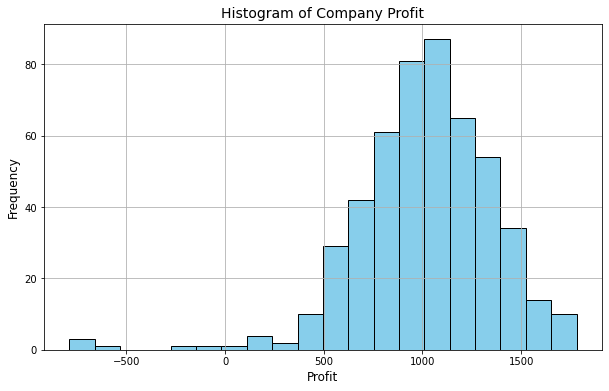

In [23]:
#Histogarm
plt.figure(figsize=(10, 6))
plt.hist(df["Profit"], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Company Profit', fontsize=14)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

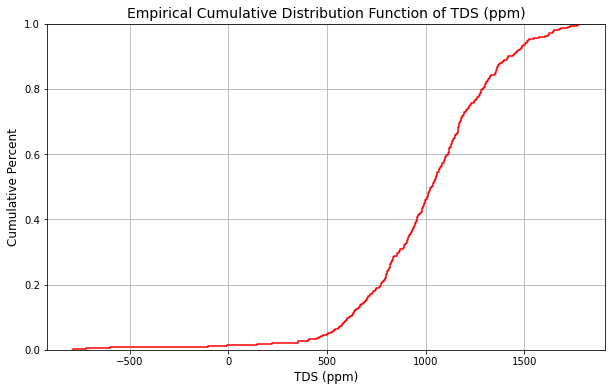

In [24]:
#Empirical Cumulative Distribution Function (ECDF)
plt.figure(figsize=(10, 6))
sns.ecdfplot(df["Profit"], color='red')
plt.title('Empirical Cumulative Distribution Function of TDS (ppm)', fontsize=14)
plt.xlabel('TDS (ppm)', fontsize=12)
plt.ylabel('Cumulative Percent', fontsize=12)
plt.grid(True)
plt.show()

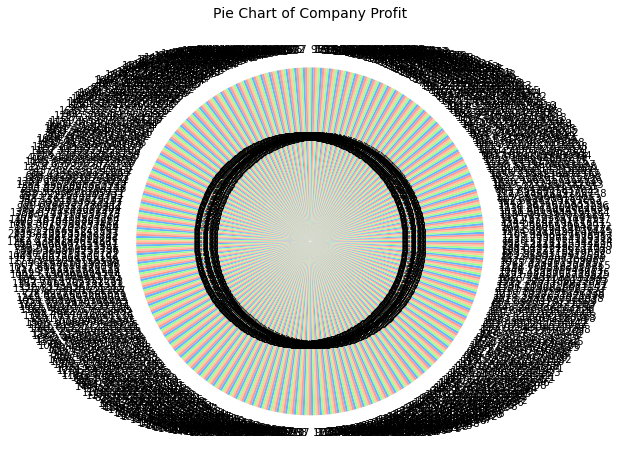

In [25]:
#Pie Chart 
profit_bins = [-800, -400, 0, 400, 800, 1200, 1600]
profit_labels = ['-800 - -400', '-400 - 0', '0 - 400', '400-800','800-1200', '1200-1600']
profit_ranges = pd.cut(df["Profit"], bins=profit_bins, labels=profit_labels)
profit_counts = df["Profit"].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(profit_counts, labels=profit_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Pie Chart of Company Profit', fontsize=14)
plt.show()

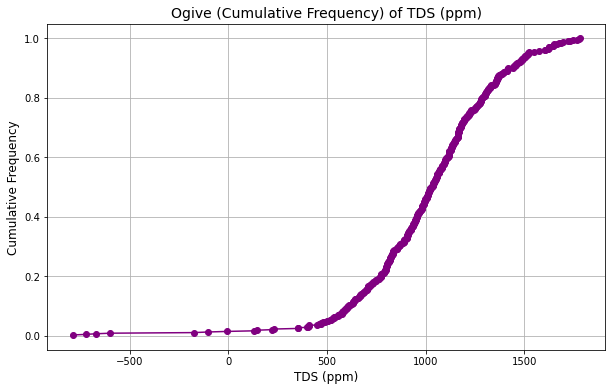

In [26]:
#Ogive (Cumulative Frequency Line Chart)
sorted_tds = np.sort(df["Profit"])
cumulative_frequencies = np.arange(1, len(sorted_tds)+1) / len(sorted_tds)

plt.figure(figsize=(10, 6))
plt.plot(sorted_tds, cumulative_frequencies, marker='o', linestyle='-', color='purple')
plt.title('Ogive (Cumulative Frequency) of TDS (ppm)', fontsize=14)
plt.xlabel('TDS (ppm)', fontsize=12)
plt.ylabel('Cumulative Frequency', fontsize=12)
plt.grid(True)
plt.show()

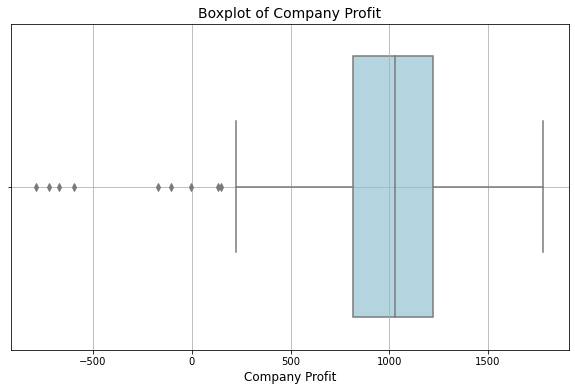

In [27]:
#Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Profit"], color='lightblue')
plt.title('Boxplot of Company Profit', fontsize=14)
plt.xlabel('Company Profit', fontsize=12)
plt.grid(True)
plt.show()

In [28]:
def fun1(num):
  return num + 25
fun1(5)


30

In [29]:
print(num)

NameError: name 'num' is not defined

In [ ]:
a = 2
a = 4
a = 6
print(a + a + a)

In [ ]:
letters = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]

In [ ]:
letters[::2]

In [ ]:
l=[]
for i in range(1,21):
    l.append(i)
l

In [ ]:
if var_1 > var_2:
    print("If")
elif var_3 > var_2 :
    print("First Else If")
elif var_3 > var_1 :
    print("Second Else If")

In [ ]:
var_1 = 10
var_2 = 30
var_3 = 50

In [ ]:
guessed_num= input("Guess the number")
actual_num= 25
if guessed_num > actual_num:
    print("too high")
    elif guessed_num < actual_num:
    print("too low")
    elif guessed_num = actual_num:
    print("")
    

In [38]:
bins = [-800,-700, -600, -500, -400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]

frequency, class_intervals = np.histogram(df["Profit"], bins=bins)

df2 = pd.DataFrame({
    'Class Interval': [f"{class_intervals[i]} - {class_intervals[i+1]}" for i in range(len(class_intervals)-1)],
    'Frequency': frequency
})

df2['Relative Frequency'] = df2['Frequency'] / df2['Frequency'].sum()

df2['Cumulative Relative Frequency'] = df2['Relative Frequency'].cumsum()


In [39]:
df2

,Class Interval,Frequency,Relative Frequency,Cumulative Relative Frequency
0,-800 - -700,2,0.004283,0.004283
1,-700 - -600,1,0.002141,0.006424
2,-600 - -500,1,0.002141,0.008565
3,-500 - -400,0,0.000000,0.008565
4,-400 - -300,0,0.000000,0.008565
5,-300 - -200,0,0.000000,0.008565
6,-200 - -100,2,0.004283,0.012848
7,-100 - 0,1,0.002141,0.014989
8,0 - 100,0,0.000000,0.014989
9,100 - 200,2,0.004283,0.019272


In [40]:
df3= df2[["Class Interval", "Frequency"]]

In [41]:
df3

,Class Interval,Frequency
0,-800 - -700,2
1,-700 - -600,1
2,-600 - -500,1
3,-500 - -400,0
4,-400 - -300,0
5,-300 - -200,0
6,-200 - -100,2
7,-100 - 0,1
8,0 - 100,0
9,100 - 200,2


In [45]:
import pandas as pd
df3.to_csv('Class_Interval_dataset2.csv', index=False)

In [46]:
import pandas as pd
from IPython.display import FileLink
# Provide a download link
FileLink('Class_Interval_dataset2.csv')

/Users/apple/Class_Interval_dataset2.csv

In [48]:
import numpy as np
import pandas as pd

# Provided class intervals and observed frequencies
class_intervals = [
    (-800, -700), (-700, -600), (-600, -500), (-500, -400), (-400, -300), 
    (-300, -200), (-200, -100), (-100, 0), (0, 100), (100, 200), (200, 300), 
    (300, 400), (400, 500), (500, 600), (600, 700), (700, 800), 
    (800, 900), (900, 1000), (1000, 1100), (1100, 1200), (1200, 1300), 
    (1300, 1400), (1400, 1500)
]
observed_frequencies = [2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 11, 22, 30, 39, 48, 66, 67, 69, 42, 37, 23]

# Sample mean
mean = 404.4800

# Rate parameter (lambda)
lambda_ = 1 / mean

# Function to calculate class probability
def calculate_class_probability(lower_bound, upper_bound, lambda_):
    return np.exp(-lambda_ * lower_bound) - np.exp(-lambda_ * upper_bound)

# Total number of observations
n = sum(observed_frequencies)

# Calculate class probabilities
class_probabilities = [calculate_class_probability(lower, upper, lambda_) for lower, upper in class_intervals]

# Calculate expected frequencies (Ei)
expected_frequencies = [p * n for p in class_probabilities]

# Calculate Chi-Square components
chi_square_components = [((observed - expected) ** 2) / expected for observed, expected in zip(observed_frequencies, expected_frequencies)]

# Create DataFrame for displaying the results
df_results = pd.DataFrame({
    'Class Interval': [f"{lower} - {upper}" for lower, upper in class_intervals],
    'Observed Frequency (O_i)': observed_frequencies,
    'Class Probability (P_i)': class_probabilities,
    'Expected Frequency (E_i)': expected_frequencies,
    'Chi-Square Component': chi_square_components
})

# Display the DataFrame directly in the notebook
df_results


,Class Interval,Observed Frequency (O_i),Class Probability (P_i),Expected Frequency (E_i),Chi-Square Component
0,-800 - -700,2,1.583038,739.278899,735.284309
1,-700 - -600,1,1.236290,577.347442,575.349174
2,-600 - -500,1,0.965493,450.885409,448.887627
3,-500 - -400,0,0.754012,352.123587,352.123587
4,-400 - -300,0,0.588853,274.994528,274.994528
5,-300 - -200,0,0.459871,214.759798,214.759798
6,-200 - -100,2,0.359141,167.718868,163.742718
7,-100 - 0,1,0.280475,130.981771,128.989406
8,0 - 100,0,0.219040,102.291558,102.291558
9,100 - 200,2,0.171061,79.885642,75.935714


In [49]:
import numpy as np
import pandas as pd

# Provided class intervals and observed frequencies
class_intervals = [
    (-800, -700), (-700, -600), (-600, -500), (-500, -400), (-400, -300), 
    (-300, -200), (-200, -100), (-100, 0), (0, 100), (100, 200), (200, 300), 
    (300, 400), (400, 500), (500, 600), (600, 700), (700, 800), 
    (800, 900), (900, 1000), (1000, 1100), (1100, 1200), (1200, 1300), 
    (1300, 1400), (1400, 1500)
]
observed_frequencies = [2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 11, 22, 30, 39, 48, 66, 67, 69, 42, 37, 23]

# Sample mean
mean = 1013.678785

# Rate parameter (lambda)
lambda_ = 1 / mean

# Function to calculate class probability
def calculate_class_probability(lower_bound, upper_bound, lambda_):
    return np.exp(-lambda_ * lower_bound) - np.exp(-lambda_ * upper_bound)

# Total number of observations
n = sum(observed_frequencies)

# Calculate class probabilities
class_probabilities = [calculate_class_probability(lower, upper, lambda_) for lower, upper in class_intervals]

# Calculate expected frequencies (Ei)
expected_frequencies = [p * n for p in class_probabilities]

# Calculate Chi-Square components
chi_square_components = [((observed - expected) ** 2) / expected for observed, expected in zip(observed_frequencies, expected_frequencies)]

# Create DataFrame for displaying the results
df_results = pd.DataFrame({
    'Class Interval': [f"{lower} - {upper}" for lower, upper in class_intervals],
    'Observed Frequency (O_i)': observed_frequencies,
    'Class Probability (P_i)': class_probabilities,
    'Expected Frequency (E_i)': expected_frequencies,
    'Chi-Square Component': chi_square_components
})

# Display the DataFrame
df_results


,Class Interval,Observed Frequency (O_i),Class Probability (P_i),Expected Frequency (E_i),Chi-Square Component
0,-800 - -700,2,0.206824,96.586879,92.628292
1,-700 - -600,1,0.187395,87.513435,85.524862
2,-600 - -500,1,0.169791,79.292357,77.304969
3,-500 - -400,0,0.153841,71.843573,71.843573
4,-400 - -300,0,0.139389,65.094534,65.094534
5,-300 - -200,0,0.126294,58.979505,58.979505
6,-200 - -100,2,0.114430,53.438926,49.513777
7,-100 - 0,1,0.103681,48.418833,46.439486
8,0 - 100,0,0.093941,43.870331,43.870331
9,100 - 200,2,0.085116,39.749119,35.849750


In [50]:
df_results.to_csv('ANOVA.csv', index=False)

In [51]:
from IPython.display import FileLink
# Provide a download link
FileLink('ANOVA.csv')

/Users/apple/ANOVA.csv